In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
valid = pd.read_csv('data/valid.csv')
test = pd.read_csv('data/test.csv')

In [3]:
df = pd.concat([train, valid, test])
df.head()

,id,text,label
0,219,Nikmati cicilan 0% kanti 12 bulan antuk pemesa...,neutral
1,209,Jaje-jaje ne sane kasajiang ngaenang tiang ber...,positive
2,436,Ibu naenang makarya ring grab Indonesia,neutral
3,394,Paling demen sajan ngajeng siang driki be siap...,positive
4,592,Pelayanan bus DAMRI luung pesan.,positive


In [4]:
df.shape

(1000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   text    1000 non-null   object
 2   label   1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB


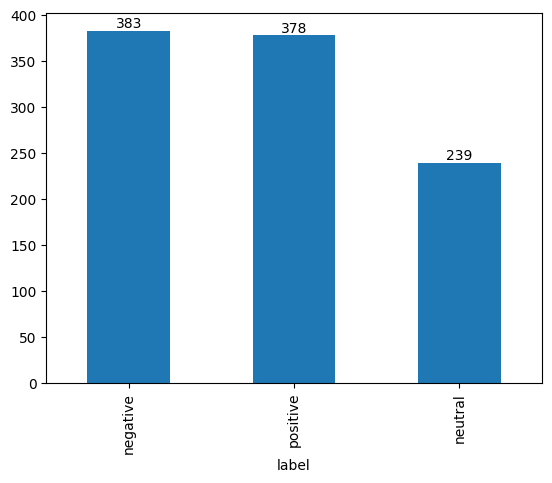

In [6]:
df['label'].value_counts().plot(kind='bar')

for i, v in enumerate(df['label'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

In [7]:
df.drop(columns=['id'], inplace=True)
df.head(2)

,text,label
0,Nikmati cicilan 0% kanti 12 bulan antuk pemesa...,neutral
1,Jaje-jaje ne sane kasajiang ngaenang tiang ber...,positive


In [8]:
mask = df['label'] != 'neutral'
df = df[mask]
df.head()

,text,label
1,Jaje-jaje ne sane kasajiang ngaenang tiang ber...,positive
3,Paling demen sajan ngajeng siang driki be siap...,positive
4,Pelayanan bus DAMRI luung pesan.,positive
7,"Barange lumayan, nanging sane tiang heran xiao...",negative
8,Keweh sajan ngugu anak ane suba taen berkhianat,negative


In [9]:
label_to_num = {'positive': 1, 'negative': -1}
num_to_label = {1: 'positive', -1: 'negative'}
df['label'] = df['label'].map(label_to_num)
df['label'].astype(np.int64)

1      1
3      1
4      1
7     -1
8     -1
      ..
395    1
396   -1
397    1
398   -1
399   -1
Name: label, Length: 761, dtype: int64

In [10]:
import re
import string
def preprocessing(text: str) -> list:
    # case folding
    text = text.lower()
    # number removal
    text = re.sub(r'\d+', '', text)
    # punctuation removal
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenization
    text = text.split()
    return text

In [11]:
df['text'] = df['text'].apply(preprocessing)
df.head()

,text,label
1,"[jajejaje, ne, sane, kasajiang, ngaenang, tian...",1
3,"[paling, demen, sajan, ngajeng, siang, driki, ...",1
4,"[pelayanan, bus, damri, luung, pesan]",1
7,"[barange, lumayan, nanging, sane, tiang, heran...",-1
8,"[keweh, sajan, ngugu, anak, ane, suba, taen, b...",-1


In [12]:
X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
tfidf = TfidfVectorizer(max_features=4000, ngram_range=(1, 2))
bow = CountVectorizer(max_features=4000, ngram_range=(1, 2))

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [14]:
mnb_tfidf = MultinomialNB(alpha=.1)
mnb_tfidf.fit(X_train_tfidf, y_train)

mnb_bow = MultinomialNB(alpha=.1)
mnb_bow.fit(X_train_bow, y_train)

MultinomialNB(alpha=0.1)

In [15]:
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)
y_pred_bow = mnb_bow.predict(X_test_bow)

In [16]:
print(classification_report(y_test, y_pred_tfidf, digits=4))

              precision    recall  f1-score   support

          -1     0.9683    0.8472    0.9037        72
           1     0.8778    0.9753    0.9240        81

    accuracy                         0.9150       153
   macro avg     0.9230    0.9113    0.9138       153
weighted avg     0.9204    0.9150    0.9144       153



In [17]:
print(classification_report(y_test, y_pred_bow, digits=4))

              precision    recall  f1-score   support

          -1     0.9531    0.8472    0.8971        72
           1     0.8764    0.9630    0.9176        81

    accuracy                         0.9085       153
   macro avg     0.9148    0.9051    0.9074       153
weighted avg     0.9125    0.9085    0.9080       153



In [18]:
cf_tfidf = confusion_matrix(y_test, y_pred_tfidf)
cf_bow = confusion_matrix(y_test, y_pred_bow)

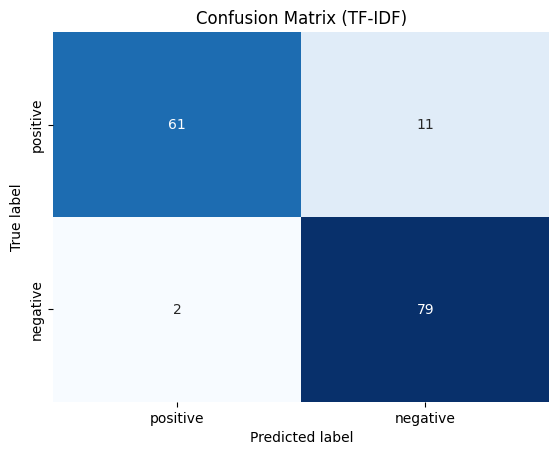

In [19]:
sns.heatmap(cf_tfidf, annot=True, cmap='Blues', cbar=False, xticklabels=num_to_label.values(), yticklabels=num_to_label.values())
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (TF-IDF)')
plt.savefig('out/cf_tfidf.png', bbox_inches='tight', dpi=300)

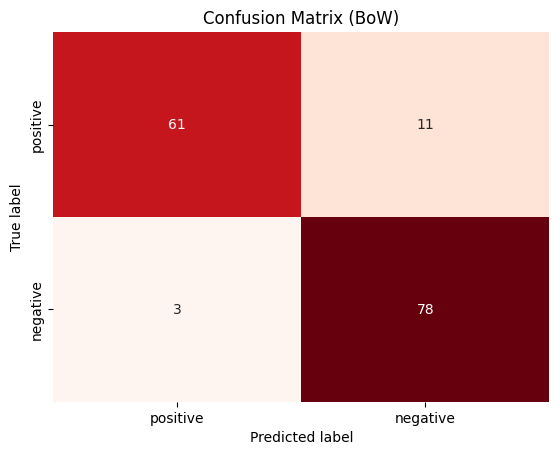

In [20]:
sns.heatmap(cf_bow, annot=True, cmap='Reds', cbar=False, xticklabels=num_to_label.values(), yticklabels=num_to_label.values())
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix (BoW)')
plt.savefig('out/cf_bow.png', bbox_inches='tight', dpi=300)

In [21]:
text = "tiang masi gedeg basange yen ketoange"

num_to_label[mnb_tfidf.predict(tfidf.transform(preprocessing(text)))[0]]

'negative'